In [ ]:
Hamza NAshaat Abdelbaki (221100328)

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files  # For downloading the file

# Load the dataset
df = pd.read_csv("/content/filtered_music_listening_data.csv")

# Convert Listening Time to total seconds
def listening_time_in_seconds(time_str):
    minutes, seconds = map(int, time_str.split(":"))
    return minutes * 60 + seconds

df["Listening Time (seconds)"] = df["Listening Time"].apply(listening_time_in_seconds)

# Group by Username and Track to calculate total listening time and frequency of listens
user_song_summary = df.groupby(["Username", "Track"]).agg(
    total_listening_time=("Listening Time (seconds)", "sum"),
    listen_count=("Listening Time (seconds)", "count")
).reset_index()

# Define a function to convert listening stats to ratings (scale: 1-5)
def calculate_rating(row):
    # Customize weights based on importance of listening time and frequency
    time_weight = 0.6
    frequency_weight = 0.4

    # Normalize each component to a range of 1-5
    time_rating = min(row['total_listening_time'] / 600, 5)  # assuming 600 seconds as max reference
    frequency_rating = min(row['listen_count'] / 10, 5)      # assuming 10 listens as max reference

    # Calculate final rating
    rating = (time_rating * time_weight) + (frequency_rating * frequency_weight)
    return round(rating, 1)

# Apply the rating calculation function
user_song_summary["Rating"] = user_song_summary.apply(calculate_rating, axis=1)

# Pivot into a user-song rating matrix
rating_matrix = user_song_summary.pivot(index="Username", columns="Track", values="Rating").fillna(0)

# Save the rating matrix to a CSV file in Colab environment
output_rating_matrix_path = "rating_matrix.csv"
rating_matrix.to_csv(output_rating_matrix_path)

print(f"Rating matrix saved to {output_rating_matrix_path}")

# Download the file
files.download(output_rating_matrix_path)

Rating matrix saved to rating_matrix.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the uploaded CSV file to examine its structure
file_path = '/content/rating_matrix.csv'
rating_data = pd.read_csv(file_path)

# Display the first few rows and column information for inspection
rating_data.head(), rating_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Username             10 non-null     object 
 1   Bad Guy              10 non-null     float64
 2   Billie Jean          10 non-null     float64
 3   Blinding Lights      10 non-null     float64
 4   Bohemian Rhapsody    10 non-null     float64
 5   Circles              10 non-null     float64
 6   Closer               10 non-null     float64
 7   Dancing Queen        10 non-null     float64
 8   HUMBLE.              10 non-null     float64
 9   Heat Waves           10 non-null     float64
 10  Hey Jude             10 non-null     float64
 11  Imagine              10 non-null     float64
 12  Industry Baby        10 non-null     float64
 13  Levitating           10 non-null     float64
 14  Lovely               10 non-null     float64
 15  Lucid Dreams         10 non-null     float6

(       Username  Bad Guy  Billie Jean  Blinding Lights  Bohemian Rhapsody  \
 0    beatbuster      0.8          1.0              2.1                0.8   
 1  beatslover21      3.2          1.5              1.1                3.0   
 2  groovemaster      2.1          1.0              1.5                3.1   
 3   melodymaker      3.2          3.2              3.2                2.5   
 4    musicfan92      1.0          1.5              0.5                1.0   
 
    Circles  Closer  Dancing Queen  HUMBLE.  Heat Waves  ...  SICKO MODE  \
 0      3.4     3.0            0.8      2.4         1.3  ...         1.6   
 1      1.1     1.9            1.0      0.7         2.2  ...         3.2   
 2      1.5     0.6            3.2      1.1         2.4  ...         1.7   
 3      3.2     0.0            3.2      1.4         0.0  ...         0.0   
 4      1.3     0.9            0.7      0.4         0.0  ...         1.5   
 
    Shape of You  Somebody Else  Stay  Sunflower  Take on Me  Uptown Fun

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Separate the Username column from the ratings
username_column = rating_data["Username"]
ratings = rating_data.drop(columns=["Username"])

# Use MinMaxScaler to scale all numeric ratings to a 1-to-5 range
scaler = MinMaxScaler(feature_range=(1, 5))
scaled_ratings = scaler.fit_transform(ratings)

# Combine the scaled ratings back with the Username column
scaled_rating_data = pd.DataFrame(scaled_ratings, columns=ratings.columns)
scaled_rating_data.insert(0, "Username", username_column)

# Save the adjusted dataset to a new file
output_path = '/content/rating_matrix_scaled_1_to_5.csv'
scaled_rating_data.to_csv(output_path, index=False)

output_path


'/content/rating_matrix_scaled_1_to_5.csv'

In [ ]:
# Load the new uploaded file to apply rounding
file_path_scaled = '/content/rating_matrix_scaled_1_to_5.csv'
rating_matrix_scaled = pd.read_csv(file_path_scaled)

# Round up the ratings to the nearest whole number
rating_matrix_rounded = rating_matrix_scaled.copy()
rating_columns_scaled = rating_matrix_scaled.columns[1:]  # Exclude "Username"
rating_matrix_rounded[rating_columns_scaled] = rating_matrix_scaled[rating_columns_scaled].applymap(lambda x: int(x + 0.5))

# Save the rounded ratings to a new CSV file
rounded_file_path = '/content/rating_matrix_rounded_1_to_5.csv'
rating_matrix_rounded.to_csv(rounded_file_path, index=False)

<ipython-input-8-d3a34100a456>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rating_matrix_rounded[rating_columns_scaled] = rating_matrix_scaled[rating_columns_scaled].applymap(lambda x: int(x + 0.5))


In [ ]:
# List of active users
active_users = ["beatslover21", "groovemaster", "musicfan92"]

# Initialize a dictionary to store results for each active user
results = {}

for active_user in active_users:
    # Get ratings for the current active user
    active_ratings = df[df["Username"] == active_user].iloc[0, 1:]  # Exclude the Username column

    # Initialize counters for this active user
    co_rated_users = 0
    co_rated_counts = {}

    # Compare active user ratings with other users
    for _, row in df.iterrows():
        if row["Username"] == active_user:
            continue  # Skip the active user

        other_user = row["Username"]
        other_ratings = row[1:]  # Exclude the Username column

        # Find co-rated items (both users have non-zero ratings)
        co_rated = (active_ratings != 0) & (other_ratings != 0)
        co_rated_items = co_rated.sum()

        if co_rated_items > 0:
            co_rated_users += 1
            co_rated_counts[other_user] = co_rated_items

    # Store results for the active user
    results[active_user] = {
        "co_rated_users": co_rated_users,
        "co_rated_counts": co_rated_counts
    }

# Display results
for user, data in results.items():
    print(f"\nActive User: {user}")
    print(f"Number of users with co-rated items: {data['co_rated_users']}")
    print("Co-rated items count for each user:")
    for other_user, count in data['co_rated_counts'].items():
        print(f"{other_user}: {count} co-rated items")



Active User: beatslover21
Number of users with co-rated items: 9
Co-rated items count for each user:
beatbuster: 25 co-rated items
groovemaster: 25 co-rated items
melodymaker: 25 co-rated items
musicfan92: 24 co-rated items
rhythmaddict: 25 co-rated items
rhythmlove88: 26 co-rated items
soundexplorer: 24 co-rated items
tunes_lover1: 26 co-rated items
vibesonly22: 26 co-rated items

Active User: groovemaster
Number of users with co-rated items: 9
Co-rated items count for each user:
beatbuster: 26 co-rated items
beatslover21: 25 co-rated items
melodymaker: 27 co-rated items
musicfan92: 25 co-rated items
rhythmaddict: 23 co-rated items
rhythmlove88: 27 co-rated items
soundexplorer: 25 co-rated items
tunes_lover1: 27 co-rated items
vibesonly22: 26 co-rated items

Active User: musicfan92
Number of users with co-rated items: 9
Co-rated items count for each user:
beatbuster: 25 co-rated items
beatslover21: 24 co-rated items
groovemaster: 25 co-rated items
melodymaker: 26 co-rated items
rhyth

2-D Array (Number of Common Users and Corresponding Co-Rated Items):
    Common Users  Co-Rated Items
6   rhythmlove88              79
8   tunes_lover1              79
3    melodymaker              78
9    vibesonly22              77
0     beatbuster              76
7  soundexplorer              73
5   rhythmaddict              70
2   groovemaster              50
1   beatslover21              49
4     musicfan92              49


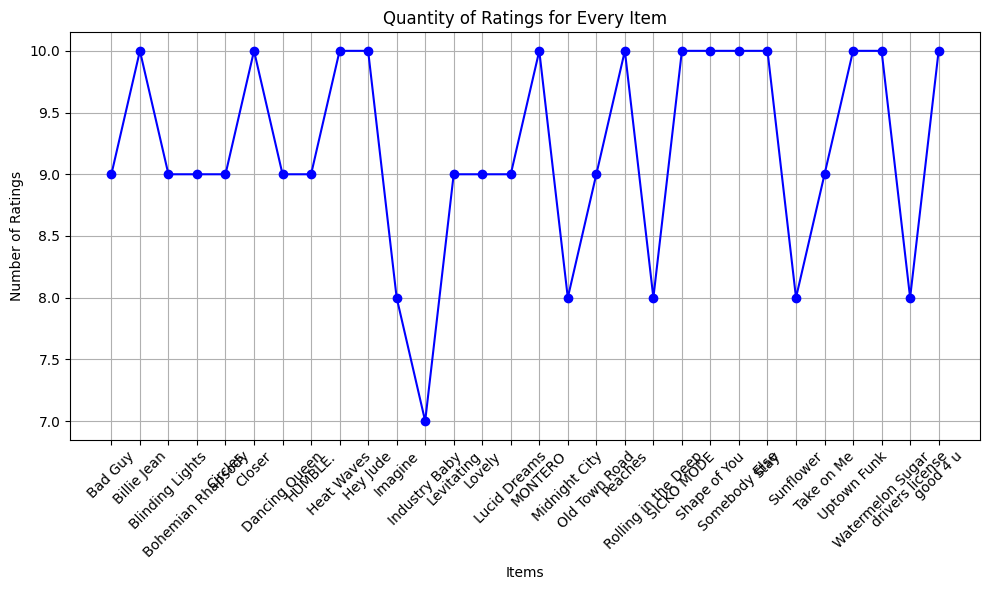

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/rating_matrix_rounded_1_to_5 (new).csv')

# List of active users
active_users = ["beatslover21", "groovemaster", "musicfan92"]

# Initialize an empty list for 2-D array data
array_data = []

# Iterate through active users to calculate common users and co-rated items
for active_user in active_users:
    active_ratings = df[df["Username"] == active_user].iloc[0, 1:]  # Exclude the Username column

    for _, row in df.iterrows():
        if row["Username"] == active_user:
            continue  # Skip the active user

        other_user = row["Username"]
        other_ratings = row[1:]  # Exclude the Username column

        # Find co-rated items
        co_rated = (active_ratings != 0) & (other_ratings != 0)
        co_rated_items = co_rated.sum()

        if co_rated_items > 0:
            array_data.append((other_user, co_rated_items))

# Create the 2-D array
array_df = pd.DataFrame(array_data, columns=["Common Users", "Co-Rated Items"])
array_df = array_df.groupby("Common Users")["Co-Rated Items"].sum().reset_index()
array_df.sort_values(by="Co-Rated Items", ascending=False, inplace=True)

# Print the 2-D array
print("2-D Array (Number of Common Users and Corresponding Co-Rated Items):")
print(array_df)

# Visualization: Curve for the quantity of ratings for every item
item_counts = (df.iloc[:, 1:] != 0).sum(axis=0)  # Count non-zero ratings for each item

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(item_counts.index, item_counts.values, marker="o", linestyle="-", color="b")
plt.title("Quantity of Ratings for Every Item")
plt.xlabel("Items")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# Total items in the dataset (excluding "Username")
total_items = len(df.columns) - 1

# Calculate 30% of items
threshold_items = np.ceil(0.3 * total_items)

# Initialize a dictionary to store results for each active user
threshold_results = {}

for active_user in active_users:
    active_ratings = df[df["Username"] == active_user].iloc[0, 1:]  # Exclude the Username column

    # Track users who meet the threshold
    user_counts = 0

    for _, row in df.iterrows():
        if row["Username"] == active_user:
            continue  # Skip the active user

        other_user = row["Username"]
        other_ratings = row[1:]  # Exclude the Username column

        # Find co-rated items
        co_rated = (active_ratings != 0) & (other_ratings != 0)
        co_rated_items = co_rated.sum()

        # Check if the user meets the 30% threshold
        if co_rated_items >= threshold_items:
            user_counts += 1

    # Store the threshold for the active user
    threshold_results[active_user] = user_counts

# Display results
print("Threshold (Q) for each active user:")
for user, count in threshold_results.items():
    print(f"{user}: {count} users meet the threshold of {int(threshold_items)} co-rated items")


Threshold (Q) for each active user:
beatslover21: 9 users meet the threshold of 9 co-rated items
groovemaster: 9 users meet the threshold of 9 co-rated items
musicfan92: 9 users meet the threshold of 9 co-rated items


In [ ]:

data = pd.read_csv('/content/rating_matrix_rounded_1_to_5 (new).csv')
df = pd.DataFrame(data).set_index("Username")

# Active users (beatslover21, groovemaster, musicfan92)
active_users = ["beatslover21", "groovemaster", "musicfan92"]

# Function to compute Cosine Similarity
def cosine_similarity(user1, user2):
    common_items = (user1 != 0) & (user2 != 0)  # Only consider co-rated items
    if common_items.sum() == 0:
        return 0  # No common ratings
    u1 = user1[common_items]
    u2 = user2[common_items]
    return np.dot(u1, u2) / (np.sqrt(np.dot(u1, u1)) * np.sqrt(np.dot(u2, u2)))

# Function to calculate Pearson Correlation Coefficient (PCC)
def pearson_correlation(user1, user2):
    common_items = (user1 != 0) & (user2 != 0)
    if common_items.sum() == 0:
        return 0
    u1 = user1[common_items]
    u2 = user2[common_items]
    mean_u1 = np.mean(u1)
    mean_u2 = np.mean(u2)
    numerator = np.sum((u1 - mean_u1) * (u2 - mean_u2))
    denominator = np.sqrt(np.sum((u1 - mean_u1)**2) * np.sum((u2 - mean_u2)**2))
    return numerator / denominator if denominator != 0 else 0

# Function for Mean-Centering the ratings
def mean_centered_ratings(user_ratings):
    mean_rating = np.mean(user_ratings[user_ratings != 0])  # Ignore unrated items
    return user_ratings - mean_rating

# Function to calculate Discount Factor (DF)
def calculate_discount_factor(neighbor_ratings, threshold_q=2):
    co_rated_items = sum(1 for rating in neighbor_ratings if rating != 0)  # Number of co-rated items
    df = co_rated_items / threshold_q
    return min(df, 1)  # Cap DF at 1

# Function for predicting ratings
def predict_rating(active_user, item, neighbors, df, similarity_func=None, mean_centered=False, threshold_q=2):
    numerator = 0
    denominator = 0
    for neighbor, similarity in neighbors:
        neighbor_ratings = df.loc[neighbor, :]
        if mean_centered:
            neighbor_ratings = mean_centered_ratings(neighbor_ratings)  # Apply mean-centering
        if df.loc[neighbor, item] != 0:  # If the neighbor has rated the item
            similarity_value = similarity
            if threshold_q:
                df_value = calculate_discount_factor(neighbor_ratings, threshold_q)
                similarity_value *= df_value  # Apply DF and DS
            numerator += similarity_value * df.loc[neighbor, item]
            denominator += abs(similarity_value)
    return numerator / denominator if denominator != 0 else 0

# Function to get top N neighbors based on similarity
def get_top_neighbors(similarity_scores, top_percentage=0.2):
    sorted_neighbors = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_neighbors[:int(len(sorted_neighbors) * top_percentage)]

# Predict ratings for all active users
for active_user in active_users:
    print(f"Predictions for {active_user}:")
    active_ratings = df.loc[active_user]

    # Calculate similarity between the active user and all other users
    similarities = {}
    for user in df.index:
        if user != active_user:
            similarities[user] = cosine_similarity(active_ratings, df.loc[user])  # Using Cosine Similarity for Case Study 1.1

    # Step 2: Identify Top 20% Closest Users
    top_neighbors = get_top_neighbors(similarities, top_percentage=0.2)

    # Step 3: Predict Ratings (without mean-centering)
    predictions_without_df = {item: predict_rating(active_user, item, top_neighbors, df, similarity_func=cosine_similarity)
                              for item in df.columns if active_ratings[item] == 0}
    print(f"Predicted Ratings (without DF): {predictions_without_df}")

    # Step 4: Apply Mean-Centering and Predict Ratings for Case Study 1.2 (with mean-centering)
    predictions_with_mean_centering = {item: predict_rating(active_user, item, top_neighbors, df, similarity_func=cosine_similarity, mean_centered=True)
                                       for item in df.columns if active_ratings[item] == 0}
    print(f"Predicted Ratings (with Mean-Centering): {predictions_with_mean_centering}")

    # Step 5: Predict Ratings using Pearson Correlation (Case Study 1.3)
    similarities_pcc = {}
    for user in df.index:
        if user != active_user:
            similarities_pcc[user] = pearson_correlation(active_ratings, df.loc[user])  # Using Pearson Correlation for Case Study 1.3

    top_neighbors_pcc = get_top_neighbors(similarities_pcc, top_percentage=0.2)
    predictions_with_pcc = {item: predict_rating(active_user, item, top_neighbors_pcc, df, similarity_func=pearson_correlation)
                            for item in df.columns if active_ratings[item] == 0}
    print(f"Predicted Ratings (using PCC): {predictions_with_pcc}")

    # Final comparison (Cosine Similarity vs Mean-Centering vs Pearson)
    print("\nComparison of Predicted Ratings:")
    for item in predictions_without_df:
        print(f"{item}: Cosine Similarity = {predictions_without_df[item]:.2f}, Mean-Centering = {predictions_with_mean_centering[item]:.2f}, PCC = {predictions_with_pcc[item]:.2f}")
    print("\n" + "-"*50)


Predictions for beatslover21:
Predicted Ratings (without DF): {'Industry Baby': 2.0, 'Midnight City': 5.0, 'Sunflower': 1.0}
Predicted Ratings (with Mean-Centering): {'Industry Baby': 2.0, 'Midnight City': 5.0, 'Sunflower': 1.0}
Predicted Ratings (using PCC): {'Industry Baby': 2.0, 'Midnight City': 2.0, 'Sunflower': 3.0}

Comparison of Predicted Ratings:
Industry Baby: Cosine Similarity = 2.00, Mean-Centering = 2.00, PCC = 2.00
Midnight City: Cosine Similarity = 5.00, Mean-Centering = 5.00, PCC = 2.00
Sunflower: Cosine Similarity = 1.00, Mean-Centering = 1.00, PCC = 3.00

--------------------------------------------------
Predictions for groovemaster:
Predicted Ratings (without DF): {'Levitating': 2.0, 'drivers license': 5.0}
Predicted Ratings (with Mean-Centering): {'Levitating': 2.0, 'drivers license': 5.0}
Predicted Ratings (using PCC): {'Levitating': 2.0, 'drivers license': 5.0}

Comparison of Predicted Ratings:
Levitating: Cosine Similarity = 2.00, Mean-Centering = 2.00, PCC = 2.0

In [ ]:
import numpy as np

# Cosine similarity function
def cosine_similarity_items(item1, item2):
    common_users = (item1 != 0) & (item2 != 0)
    if common_users.sum() == 0:
        return 0
    i1 = item1[common_users]
    i2 = item2[common_users]
    return np.dot(i1, i2) / (np.sqrt(np.dot(i1, i1)) * np.sqrt(np.dot(i2, i2)))

# Pearson Correlation function
def pearson_correlation_items(item1, item2):
    common_users = (item1 != 0) & (item2 != 0)
    if common_users.sum() == 0:
        return 0
    i1 = item1[common_users]
    i2 = item2[common_users]
    mean_i1 = np.mean(i1)
    mean_i2 = np.mean(i2)
    numerator = np.sum((i1 - mean_i1) * (i2 - mean_i2))
    denominator = np.sqrt(np.sum((i1 - mean_i1) ** 2) * np.sum((i2 - mean_i2) ** 2))
    return numerator / denominator if denominator != 0 else 0

# Mean-centering function
def mean_centered_ratings(user_ratings):
    mean_rating = np.mean(user_ratings[user_ratings != 0])
    return user_ratings - mean_rating

# Prediction function
def predict_rating_items(target_item, neighbors, df, similarity_func, mean_centered=False, threshold_q=2):
    numerator = 0
    denominator = 0
    for neighbor, similarity in neighbors:
        neighbor_ratings = df[neighbor]
        if mean_centered:
            neighbor_ratings = mean_centered_ratings(neighbor_ratings)
        co_rated_items = np.sum((df[target_item] != 0) & (neighbor_ratings != 0))
        df_value = min(co_rated_items / threshold_q, 1)
        similarity_value = similarity * df_value
        numerator += similarity_value * neighbor_ratings
        denominator += abs(similarity_value)
    return float(np.sum(numerator) / np.sum(denominator)) if denominator != 0 else 0  # Ensure scalar output

# Get top neighbors
def get_top_neighbors_items(similarity_scores, top_percentage=0.2):
    sorted_neighbors = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_neighbors[:max(1, int(len(sorted_neighbors) * top_percentage))]

# Perform predictions
target_items = [item for item in ["Old Town Road", "Imagine"] if item in df.columns]

for target_item in target_items:
    print(f"Predictions for {target_item}:")

    # Step 1: Cosine Similarity
    similarities_cosine = {item: cosine_similarity_items(df[target_item], df[item])
                           for item in df.columns if item != target_item}
    top_neighbors_cosine = get_top_neighbors_items(similarities_cosine, top_percentage=0.2)
    predictions_cosine = {user: predict_rating_items(target_item, top_neighbors_cosine, df, cosine_similarity_items)
                          for user in df.index if df.at[user, target_item] == 0}
    print(f"Predicted Ratings (without DF): {predictions_cosine}")

    # Step 2: Mean-Centering
    predictions_mean_centering = {user: predict_rating_items(target_item, top_neighbors_cosine, df, cosine_similarity_items, mean_centered=True)
                                   for user in df.index if df.at[user, target_item] == 0}
    print(f"Predicted Ratings (with Mean-Centering): {predictions_mean_centering}")

    # Step 3: Pearson Correlation
    similarities_pcc = {item: pearson_correlation_items(df[target_item], df[item])
                        for item in df.columns if item != target_item}
    top_neighbors_pcc = get_top_neighbors_items(similarities_pcc, top_percentage=0.2)
    predictions_pcc = {user: predict_rating_items(target_item, top_neighbors_pcc, df, pearson_correlation_items)
                       for user in df.index if df.at[user, target_item] == 0}
    print(f"Predicted Ratings (using PCC): {predictions_pcc}")

    # Step 4: Comparison
    print("\nComparison of Predicted Ratings:")
    for user in predictions_cosine:
        print(f"{user}: Cosine Similarity = {predictions_cosine[user]:.2f}, "
              f"Mean-Centering = {predictions_mean_centering[user]:.2f}, "
              f"PCC = {predictions_pcc[user]:.2f}")
    print("\n" + "-"*50)


Predictions for Old Town Road:
Predicted Ratings (without DF): {'beatbuster': 28.589304840620123}
Predicted Ratings (with Mean-Centering): {'beatbuster': -4.630922468213003}
Predicted Ratings (using PCC): {'beatbuster': 26.494218178982933}

Comparison of Predicted Ratings:
beatbuster: Cosine Similarity = 28.59, Mean-Centering = -4.63, PCC = 26.49

--------------------------------------------------
Predictions for Imagine:
Predicted Ratings (without DF): {'melodymaker': 29.356277377361955, 'musicfan92': 29.356277377361955}
Predicted Ratings (with Mean-Centering): {'melodymaker': -3.2265941796421274, 'musicfan92': -3.2265941796421274}
Predicted Ratings (using PCC): {'melodymaker': 27.0952594071143, 'musicfan92': 27.0952594071143}

Comparison of Predicted Ratings:
melodymaker: Cosine Similarity = 29.36, Mean-Centering = -3.23, PCC = 27.10
musicfan92: Cosine Similarity = 29.36, Mean-Centering = -3.23, PCC = 27.10

--------------------------------------------------
